In [1]:
# PS5_EX1
# general
import numpy as np
import matplotlib.pyplot as plt

mu = np.array([0.08, 0.14, 0.16])
sigma = np.array([0.1, 0.30, 0.35])
corr = 0.2
R0 = 0.05
cov   = np.array([[sigma[0]**2,corr*sigma[0]*sigma[1],corr*sigma[0]*sigma[2]],\
                  [corr*sigma[0]*sigma[1],sigma[1]**2,corr*sigma[1]*sigma[2]],\
                  [corr*sigma[2]*sigma[0],corr*sigma[2]*sigma[1],sigma[2]**2]])

In [2]:
#(a)
ones = np.ones(3)
cov_inv = np.linalg.inv(cov)

w_t = np.matmul(cov_inv,(mu-R0))/np.matmul(np.matmul(ones.transpose(),cov_inv),(mu-R0))
mu_t = np.matmul(w_t.transpose(),mu)
sig2_t = np.matmul(np.matmul(w_t.transpose(),cov),w_t)
SR_t   = (mu_t-R0)/np.sqrt(sig2_t)

print('The tangency portfolio is: ', w_t)
print('Expected return: ', mu_t)
print('Variance: ', sig2_t)
print('Sharp Ratio: ', SR_t)

The tangency portfolio is:  [0.60858939 0.20286313 0.18854749]
Expected return:  0.10725558659217878
Variance:  0.016456982850098317
Sharp Ratio:  0.446316312416276


In [3]:
#(b)
A = np.matmul(np.matmul(ones.transpose(),cov_inv),ones)
B = np.matmul(np.matmul(ones.transpose(),cov_inv),mu)
C = np.matmul(np.matmul(mu.transpose(),cov_inv),mu)
delta = A*C-B**2
lumbda  = (C-R0*B)/delta
gamma  = (R0*A-B)/delta

w_z = lumbda*np.matmul(cov_inv,ones)+gamma*np.matmul(cov_inv,mu)
mu_z = np.matmul(w_z.transpose(),mu)
sig2_z = np.matmul(np.matmul(w_z.transpose(),cov),w_z)
SR_z   = (mu_z-R0)/np.sqrt(sig2_z)

print('The zero-beta portfolio is: ', w_z)
print('Expected return: {:.2f}'.format(mu_z))
print('Variance: ', sig2_z)
print('Sharp Ratio: {:.2f}'.format(SR_z))

The zero-beta portfolio is:  [ 1.42362301 -0.19449204 -0.22913097]
Expected return: 0.05
Variance:  0.024085189718482215
Sharp Ratio: -0.00


In [4]:
#(c)(d)
m = 1.3
a = np.linspace(0.01,5,500)
a_star = SR_t/(m*np.sqrt(sig2_t))

print('The value of a*: ', a_star)

x_t_unconstrained = SR_t/(np.sqrt(sig2_t)*a)
x_z_unconstrained = np.zeros(len(a))

x_t_constrained = (mu_t-R0)/((sig2_t+sig2_z)*a)+ m*sig2_z/(sig2_t+sig2_z)
x_z_constrained = -(mu_t-R0)/((sig2_t+sig2_z)*a) + m*sig2_t/(sig2_t+sig2_z)

x_t = np.multiply(x_t_unconstrained,a>=a_star)+np.multiply(x_t_constrained,1-(a>=a_star))
x_z = np.multiply(x_z_unconstrained,a>=a_star)+np.multiply(x_z_constrained,1-(a>=a_star))

print('Wp can be expressed by (1-x_t-x_z)*w_0 + x_t*w_t + x_z*w_z')

The value of a*:  2.6762353292965524
Wp can be expressed by (1-x_t-x_z)*w_0 + x_t*w_t + x_z*w_z


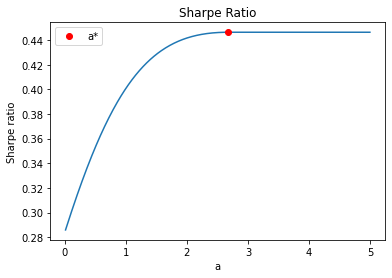

In [5]:
#(e)
x_t_1 = (mu_t-R0)/((sig2_t+sig2_z)*a_star)+ m*sig2_z/(sig2_t+sig2_z)
x_z_1= -(mu_t-R0)/((sig2_t+sig2_z)*a_star) + m*sig2_t/(sig2_t+sig2_z)
mu_star  = x_z_1*np.matmul(w_z,mu)+x_t_1*np.matmul(w_t,mu)-0.3*R0

mu_opt  = R0+x_t*(mu_t-R0)+x_z*(mu_z-R0)
sig2_opt = x_t**2*sig2_t+x_z**2*sig2_z
SR_opt = (mu_opt-R0)/np.sqrt(sig2_opt)

plt.plot(a,SR_opt)
plt.plot(a_star,SR_t,'ro',label='a*')
plt.title('Sharpe Ratio')
plt.xlabel('a')
plt.ylabel('Sharpe ratio')
plt.legend()
plt.show()

The sharp ratio falls as a falls because it also invest zero-beta portfolio which has lower sharp ratio.